In [18]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
# plt.rc('font',family= 'Malgun Gothic')  # 한글깨짐방지 두줄(Windows).
plt.rc('font',family= 'AppleGothic')    # 한글깨짐방지 두줄(Mac).
plt.rc('axes',unicode_minus=False)

In [19]:
df = pd.read_csv('데이터_전처리.csv',encoding='cp949')
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,구,위도,경도
0,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,3808746,170,...,0,5,116,49,0,0,8,NaN,NaN,NaN
1,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,2123968546,8062,...,84,2400,2154,1469,850,418,8,NaN,NaN,NaN
2,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11920008477,6667,...,0,306,634,1455,1520,2752,6,NaN,NaN,NaN
3,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,409610564,9795,...,30,2543,3556,1490,930,763,6,NaN,NaN,NaN
4,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,971389704,31185,...,1111,15614,6853,3873,3166,568,6,NaN,NaN,NaN


# 결측치 시각화

In [20]:
null_count = df.isnull().sum().sort_values()
null_count

기준_년_코드                0
월요일_매출_건수              0
주말_매출_건수               0
주중_매출_건수               0
연령대_60_이상_매출_금액        0
                   ...  
연령대_40_매출_비율           0
기준_분기_코드               0
위도                  1582
경도                  1582
구                  16841
Length: 83, dtype: int64

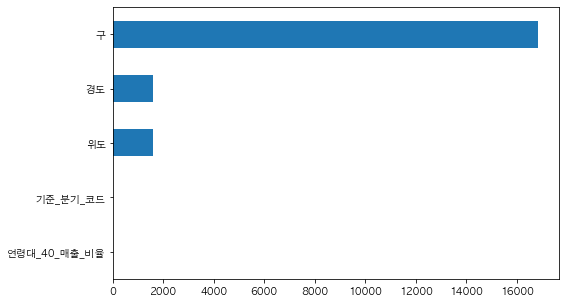

In [21]:
# 결측치 개수 시각화
null_count.tail().plot.barh(figsize=(8,5))

# 사용하지 않을 컬럼 제거

In [22]:
df = df.drop(['기준_분기_코드','상권_구분_코드','기준_년_코드','서비스_업종_코드','기준_년_코드'], axis=1)
df.head(1)

,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,구,위도,경도
0,관광특구,1001496,강남 마이스 관광특구,전자상거래업,3808746,170,75,25,0,0,...,0,5,116,49,0,0,8,NaN,NaN,NaN


In [23]:
df.rename(columns={'상권_구분_코드_명':'상권구분',
                   '상권_코드':'상권코드',
                   '상권_코드_명':'상권명',
                   '서비스_업종_코드_명':'서비스업종'
                  },
          inplace=True)
df.head(1)

,상권구분,상권코드,상권명,서비스업종,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,구,위도,경도
0,관광특구,1001496,강남 마이스 관광특구,전자상거래업,3808746,170,75,25,0,0,...,0,5,116,49,0,0,8,NaN,NaN,NaN


# 결측치 제거

In [59]:
df.shape

(132321, 79)

In [60]:
df = df.dropna(axis=0, how='any')

In [61]:
df.shape

(115480, 79)

In [65]:
df.isna().sum()

상권_구분_코드_명         0
상권_코드              0
상권_코드_명            0
서비스_업종코드명          0
분기당_매출_금액          0
                  ..
연령대_60_이상_매출_건수    0
점포수                0
구                  0
위도                 0
경도                 0
Length: 79, dtype: int64

## 컬럼 순서 변경

In [24]:
df.columns

Index(['상권구분', '상권코드', '상권명', '서비스업종', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
      

In [ ]:
d

In [67]:
df.to_csv('상권데이터_전처리_2.csv', encoding='cp949', index=False)